In [1]:
import sys
sys.path.append('..')

In [2]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from project_config import config
import os

image_size = 256
transform = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(
            config.dataset_color_mean, config.dataset_color_std
        ),
    ]
)
train = ImageFolder(os.path.join("..", config.cache_folder), transform=transform)

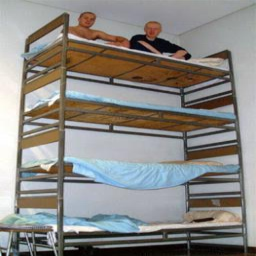

In [3]:
# print image with PIL
from PIL import Image
from dataloaders.utils import denormalize
sample = train[1][0]

Image.fromarray((denormalize(sample.unsqueeze(0))[0].permute(1, 2, 0).numpy() * 255).astype('uint8'))


In [17]:
from diffusers import AutoencoderKL

model = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae", use_safetensors=True, image_size=256)

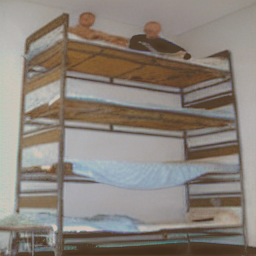

In [18]:
output = model(sample.unsqueeze(0)).sample
Image.fromarray((denormalize(output.detach().cpu())[0].permute(1, 2, 0).numpy() * 255).astype('uint8'))

In [19]:
latent = model.encode(sample.unsqueeze(0)).latent_dist

In [20]:
latent

In [21]:
latent.mode().shape

torch.Size([1, 4, 32, 32])

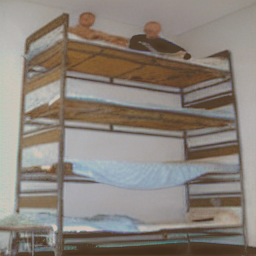

In [22]:
output = model.decode(latent.mode()).sample
Image.fromarray((denormalize(output.detach().cpu())[0].permute(1, 2, 0).numpy() * 255).astype('uint8'))